In [189]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import datetime as datetime
import nltk
import seaborn
import csv
from bs4 import BeautifulSoup
from sklearn import datasets, linear_model
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.model_selection import train_test_split 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from subprocess import check_output
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# stock price process

### convert string variable into float variable and calculate two new variable

In [228]:
def my_fun1(a,b):
    return float(a) - float(b) 

def my_fun2(a):
    return float(a)

MarketData = pd.read_csv('LabeledY.csv')
MarketData
MarketData['HighMinusLow'] = MarketData.apply(lambda x: my_fun1(x['High'],x['Low']),axis=1)
MarketData['CloseMinusOpen'] = MarketData.apply(lambda x: my_fun1(x['Adj Close'],x['Open']),axis=1)
MarketData['High'] = MarketData.apply(lambda x: my_fun2(x['High']),axis=1)
MarketData['Low'] = MarketData.apply(lambda x: my_fun2(x['Low']),axis=1)
MarketData['Open'] = MarketData.apply(lambda x: my_fun2(x['Open']),axis=1)
MarketData['Adj Close'] = MarketData.apply(lambda x: my_fun2(x['Adj Close']),axis=1)
MarketData['Daily Growth'] = MarketData.apply(lambda x: my_fun2(x['Daily Growth']),axis=1)
MarketData['LabledY'] = MarketData.apply(lambda x: my_fun2(x['LabledY']),axis=1)
MarketData
#MarketData.plot()

,Unnamed: 0,Attributes,High,Low,Open,Close,Volume,Adj Close,Daily Growth,LabledY,HighMinusLow,CloseMinusOpen
0,2,2016-09-26,2158.540039,2145.040039,2158.540039,2146.100098,3216170000,2146.100098,-0.005763,-1.0,13.500000,-12.439941
1,3,2016-09-27,2161.129883,2141.550049,2146.040039,2159.929932,3437770000,2159.929932,0.006472,1.0,19.579834,13.889893
2,4,2016-09-28,2172.399902,2151.790039,2161.850098,2171.370117,3891460000,2171.370117,0.004404,0.0,20.609863,9.520020
3,5,2016-09-29,2172.669922,2145.199951,2168.899902,2151.129883,4249220000,2151.129883,-0.008193,-1.0,27.469971,-17.770020
4,6,2016-09-30,2175.300049,2156.510010,2156.510010,2168.270020,4173340000,2168.270020,0.005453,0.0,18.790039,11.760010
5,7,2016-10-03,2164.409912,2154.770020,2164.330078,2161.199951,3137550000,2161.199951,-0.001446,0.0,9.639893,-3.130127
6,8,2016-10-04,2165.459961,2144.010010,2163.370117,2150.489990,3750890000,2150.489990,-0.005954,-1.0,21.449951,-12.880127
7,9,2016-10-05,2163.949951,2155.149902,2155.149902,2159.729980,3906550000,2159.729980,0.002125,0.0,8.800049,4.580078
8,10,2016-10-06,2162.929932,2150.280029,2158.219971,2160.770020,3461550000,2160.770020,0.001182,0.0,12.649902,2.550049
9,11,2016-10-07,2165.860107,2144.850098,2164.189941,2153.739990,3619890000,2153.739990,-0.004829,0.0,21.010010,-10.449951


### mean of stock data 

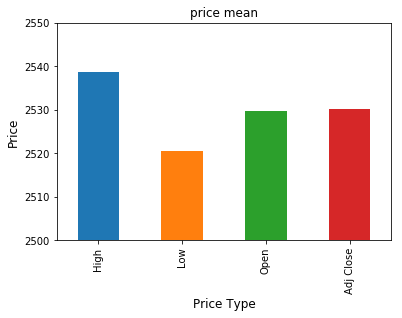

In [100]:
Market_Mean = MarketData.mean(axis=0)
Market_Mean_1 = Market_Mean[0:4]
ax = Market_Mean_1.plot(title='price mean', kind='bar')
ax.set_xlabel("Price Type",fontsize=12)
ax.set_ylabel("Price",fontsize=12)
plt.ylim(2500, 2550)
plt.show()

### news sentiment analysis

In [270]:
news = pd.read_csv('WSJ_news.csv')
#news = pd.read_csv('WSJ_news.csv')
news_title = news['News_title']
news

,Unnamed: 0,Date,News_title,News_abstract
0,0,2016-09-26,"['Indian Stocks Emerge From the Crowd ', 'Dona...",[' Indian shares are on a roll in 20...
1,1,2016-09-27,"['Takata Air Bags Recalled in South Korea ', '...",[' South Korea’s transport ministry ...
2,2,2016-09-28,"['Photos of the Day:Asia ', 'Missile System Th...",[' A man visits the Forbidden City i...
3,3,2016-09-29,"['Photos of the Day: Asia ', 'Traders to Scour...",[' Bodybuilders compete over their m...
4,4,2016-09-30,['Vietnam to Launch New Benchmark Stock Index ...,[' Vietnam said it will launch VNX A...
5,5,2016-10-03,"['U.S. Auto Sales Slipped in September ', 'Nob...",[' Light-vehicle sales sputtered in ...
6,6,2016-10-04,['Derrick Rose’s Trial Begins as Knicks Start ...,[' Knicks guard Derrick Rose’s civil...
7,7,2016-10-05,['Oregon Standoff Leader Ammon Bundy Testifies...,[' The leader of a 41-day standoff a...
8,8,2016-10-06,['North Korea Activity at Nuclear Sites Raises...,[' Satellite images showing vehicles...
9,9,2016-10-07,['U.S. Carriers to Allow Second Samsung Phone ...,[' U.S. phone carriers said Friday t...


In [271]:
sid = SentimentIntensityAnalyzer()
message_text = news_title[0]
scores = sid.polarity_scores(message_text)

for key in sorted(scores):
    print('{0}: {1}, '.format(key, scores[key]), end='')

scores['compound']

compound: 0.9508, neg: 0.084, neu: 0.815, pos: 0.101, 

0.9508

In [272]:
date = news['Date']
news_scores = []
n = 508
for i in range(n):
    message_text = news_title[i]
    scores = sid.polarity_scores(message_text)
    a = [[date[i],scores['compound']]]
    news_scores.extend(a)

senti_scores = pd.DataFrame(news_scores,columns = ['Attributes','sentiment'])
senti_scores

,Attributes,sentiment
0,2016-09-26,0.9508
1,2016-09-27,0.9881
2,2016-09-28,-0.9888
3,2016-09-29,0.9911
4,2016-09-30,-0.8984
5,2016-10-03,-0.9835
6,2016-10-04,0.9782
7,2016-10-05,-0.7556
8,2016-10-06,-0.9891
9,2016-10-07,0.8677


### combine sentiment_scores with stock price data

In [273]:
df_combine = pd.merge(MarketData, senti_scores,on='Attributes')
df_combine

,Unnamed: 0,Attributes,High,Low,Open,Close,Volume,Adj Close,Daily Growth,LabledY,HighMinusLow,CloseMinusOpen,sentiment
0,2,2016-09-26,2158.540039,2145.040039,2158.540039,2146.100098,3216170000,2146.100098,-0.005763,-1.0,13.500000,-12.439941,0.9508
1,3,2016-09-27,2161.129883,2141.550049,2146.040039,2159.929932,3437770000,2159.929932,0.006472,1.0,19.579834,13.889893,0.9881
2,4,2016-09-28,2172.399902,2151.790039,2161.850098,2171.370117,3891460000,2171.370117,0.004404,0.0,20.609863,9.520020,-0.9888
3,5,2016-09-29,2172.669922,2145.199951,2168.899902,2151.129883,4249220000,2151.129883,-0.008193,-1.0,27.469971,-17.770020,0.9911
4,6,2016-09-30,2175.300049,2156.510010,2156.510010,2168.270020,4173340000,2168.270020,0.005453,0.0,18.790039,11.760010,-0.8984
5,7,2016-10-03,2164.409912,2154.770020,2164.330078,2161.199951,3137550000,2161.199951,-0.001446,0.0,9.639893,-3.130127,-0.9835
6,8,2016-10-04,2165.459961,2144.010010,2163.370117,2150.489990,3750890000,2150.489990,-0.005954,-1.0,21.449951,-12.880127,0.9782
7,9,2016-10-05,2163.949951,2155.149902,2155.149902,2159.729980,3906550000,2159.729980,0.002125,0.0,8.800049,4.580078,-0.7556
8,10,2016-10-06,2162.929932,2150.280029,2158.219971,2160.770020,3461550000,2160.770020,0.001182,0.0,12.649902,2.550049,-0.9891
9,11,2016-10-07,2165.860107,2144.850098,2164.189941,2153.739990,3619890000,2153.739990,-0.004829,0.0,21.010010,-10.449951,0.8677


In [274]:
df_combine.to_csv('df_combine.csv')

### descrption statistics of sentiment indicator 

In [249]:
df_combine['sentiment'].describe()

count    508.000000
mean      -0.227433
std        0.821171
min       -0.996400
25%       -0.961750
50%       -0.733100
75%        0.792950
max        0.994600
Name: sentiment, dtype: float64

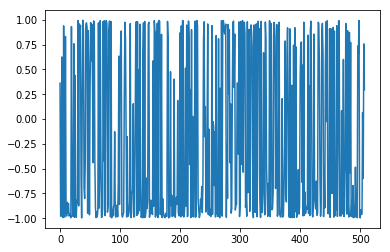

In [250]:
df_combine['sentiment'].plot()

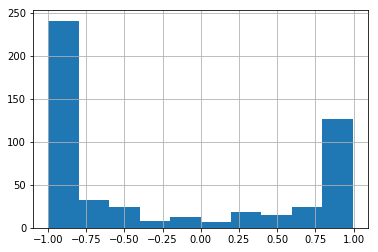

In [251]:
df_combine['sentiment'].hist()

### liner regression based on stock return and sentiment scores

[0.41880491]
[[1.32702393]]


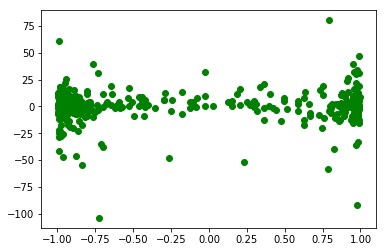

In [268]:
X = df_combine[['sentiment']]
X_train = X[0:400]
X_test = X[401:]
Y = df_combine[['CloseMinusOpen']]
Y_train = Y[0:400]
Y_test = Y[401:]
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
print(linreg.intercept_)
print(linreg.coef_)

plt.scatter(X_train,Y_train,color='green')

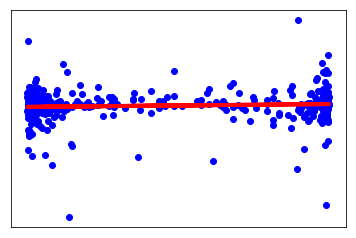

In [269]:
# Function to show the resutls of linear fit model
def show_linear_line(X_parameters,Y_parameters):
# Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    plt.scatter(X_parameters,Y_parameters,color='blue')
    plt.plot(X_parameters,regr.predict(X_parameters),color='red',linewidth=4)
    plt.xticks(())
    plt.yticks(())
    plt.show()

show_linear_line(X_train,Y_train)

Intercept value  [0.00020681]
coefficient [[0.00053544]]
Predicted value:  [[ 6.11226767e-04]
 [ 6.22256922e-04]
 [-1.34218917e-04]
 [ 4.97177112e-04]
 [-3.15413299e-04]
 [ 7.28863900e-04]
 [-3.12468355e-04]
 [-1.86799556e-04]
 [-3.02080734e-04]
 [-2.64760260e-04]
 [-2.74612436e-04]
 [-2.79431436e-04]
 [ 6.58827774e-04]
 [-3.02883900e-04]
 [ 3.85429867e-04]
 [-3.14449499e-04]
 [ 6.88598482e-04]
 [ 7.34378978e-04]
 [ 3.16036273e-04]
 [-3.04918589e-04]
 [-3.20981921e-04]
 [-2.75147881e-04]
 [ 6.64878295e-04]
 [-2.02809343e-04]
 [-2.48429206e-04]
 [-2.78414092e-04]
 [-1.27793584e-04]
 [-3.12682533e-04]
 [-2.99992501e-04]
 [ 7.28060734e-04]
 [ 7.22331479e-04]
 [ 5.22075276e-04]
 [-1.14139752e-04]
 [-3.17394443e-04]
 [-2.31883974e-04]
 [ 6.66805895e-04]
 [ 7.22599201e-04]
 [ 5.65821083e-04]
 [-3.19696854e-04]
 [-5.76503684e-05]
 [-2.72684837e-04]
 [ 5.00122056e-04]
 [ 7.30791500e-04]
 [ 1.92991152e-04]
 [ 7.36413666e-04]
 [-3.01920100e-04]
 [-3.03526434e-04]
 [-2.89015891e-04]
 [ 6.93471026

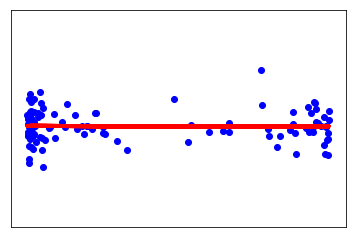

In [260]:
# make prediction
def linear_model_main(X_parameters,Y_parameters,predict_value):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_
    predictions['coefficient'] = regr.coef_
    predictions['predicted_value'] = predict_outcome
    return predictions

X,Y = X_train, Y_train
predictvalue = X_test
result = linear_model_main(X,Y,predictvalue)
print("Intercept value " , result['intercept'])
print("coefficient" , result['coefficient'])
print("Predicted value: ",result['predicted_value'])

show_linear_line(X_test,Y_test)